**Library Imports**

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

In [2]:
import os
import sys
print(sys.version)   # Python version information

3.4.4 |Anaconda 2.4.0 (64-bit)| (default, Jan 11 2016, 13:54:01) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [3]:
from sympy import *  # Symbolic mathematics
import sympy

In [4]:
#import numba        # Decorators for speeding up python functions

In [5]:
#from astropy import constants  # Physical Constants
#from astropy import units      # Physical Units

In [6]:
import matplotlib as mpl  # Standard plotting library
import matplotlib.pyplot as plt 
import seaborn as sns     # Statistical plotting and improved plot style
#import bokeh             # Interactive visualization library

In [7]:
from sympy.utilities.autowrap import ufuncify  # Creates numerical methods 
                                               # from symbolic expressions

In [8]:
from sympy import abc       # Symbolic variables
from sympy import pi as Pi  # Symbolic pi
from sympy import I as I    # Symbolic imaginary unit

**Display**

In [9]:
from IPython.display import display

In [10]:
from IPython.display import set_matplotlib_formats  
set_matplotlib_formats('pdf', 'png')

In [11]:
import ipywidgets

**Settings & Options**

In [12]:
import numpy as np   # N-Dimensional arrays and numerical routines
import scipy         # Numerical routines

np.set_printoptions(precision=5, threshold=100, edgeitems=3, linewidth=75, 
                    suppress=False, nanstr=None, infstr=None, 
                    formatter=None)

In [13]:
import pandas as pd  # Data structures and data analysis tools

pandas_options = {'display.chop_threshold': None,
                  'display.precision': 4,
                  'display.max_columns': 8,
                  'display.max_rows': 8,
                  'display.max_info_columns': 8,
                  'display.max_info_rows': 8}
for key, val in pandas_options.items():
    pd.set_option(key, val)

In [14]:
sympy.interactive.printing.init_printing(use_latex='mathjax')

In [15]:
# os.system('ipython nbconvert --to pdf {filename}.ipynb')

**Custom functions**

In [16]:
latex_path = os.path.join(os.getcwd(), 'latex', 'figures')
def figure_path(fname): 
    return os.path.join(latex_path, fname)
print(os.getcwd())

/home/jaan/Dropbox/Projects/Crowd-Dynamics/documentation/notebooks


# Field

## Walls

### Round wall

### Linear wall

In [17]:
q = symbols(['x_0:2', 'y_0:2'])
theta = symbols('theta')
rot = Matrix([[cos(theta), -sin(theta)],
              [sin(theta), cos(theta)]])
rot90 = rot.subs(theta, Pi/2)
arg = symbols('t_0:2')
t = Matrix(arg)
A = Matrix.hstack(rot90 * t, -t)
A_inv = simplify(A **-1)
A_inv = A_inv.replace(t[0]**2 + t[1]**2, 1)

In [18]:
q = Matrix(q)

In [19]:
A_inv * q

⎡t₀⋅y₀ - t₁⋅x₀   t₀⋅y₁ - t₁⋅x₁ ⎤
⎢                              ⎥
⎣-t₀⋅x₀ - t₁⋅y₀  -t₀⋅x₁ - t₁⋅y₁⎦

#### Construction
Construct linear wall from start and end points. 
\begin{align}
(\mathbf{p}_{0}, \mathbf{p}_{1}) \mapsto (\mathbf{p}_{0}, \mathbf{p}_{1}, \hat{\mathbf{t}}_{w}, \hat{\mathbf{n}}_{w}, l_w)
\end{align}

In [20]:
linear_params = [
     [[0, 0], [0, 4]],
     [[0, 0], [4, 0]],
     [[0, 4], [4, 4]]
]

In [21]:
def construct_linear_wall(linear_params):
    """

    :param linear_params: Iterable of start and end points.
    :return: Linear wall parameters in array.
    """
    # 90 degree counterclockwise rotation
    rot90 = np.array([[0, -1], [1,  0]])

    rows = len(linear_params)
    cols = 9

    wall = np.zeros((rows, cols))
    for i, p in enumerate(linear_params):
        p = np.array(p)
        d = p[1] - p[0]
        l_w = np.hypot(*d)
#         l_w = np.sqrt(np.dot(d, d))  # Length of the wall
        if l_w == 0:
            raise ValueError(
                "P_0 = {} must not be equal to P-1 = {}".format(p[0], p[1]))
        t_w = d / l_w                # Tangential (unit)vector
        n_w = np.dot(rot90, t_w)     # Normal (unit)vector
        l_w = np.array([l_w])
        wall[i, :] = np.hstack([p[0], p[1], t_w, n_w, l_w])
    return wall

In [22]:
construct_linear_wall([])

array([], shape=(0, 9), dtype=float64)

In [23]:
lw = construct_linear_wall(linear_params)

In [24]:
lw

array([[ 0.,  0.,  0.,  4.,  0.,  1., -1.,  0.,  4.],
       [ 0.,  0.,  4.,  0.,  1.,  0.,  0.,  1.,  4.],
       [ 0.,  4.,  4.,  4.,  1.,  0.,  0.,  1.,  4.]])

deconstruct

In [25]:
w = lw[0]
p_0 = w[0:2]
p_1 = w[2:4]
t_w = w[4:6]
n_w = w[6:8]
l_w = w[8]

In [26]:
p_0, p_1, t_w, n_w, l_w

(array([ 0.,  0.]),
 array([ 0.,  4.]),
 array([ 0.,  1.]),
 array([-1.,  0.]),
 4.0)

In [27]:
import numba

In [28]:
@numba.jit(nopython=True, nogil=True)
def f_iw_linear_tot(linear_wall):
    force = np.zeros(2)
    # TODO: wall object unpacking
    for i in range(len(linear_wall)):
        w = linear_wall[i]
        p_0 = w[0:2]
        p_1 = w[2:4]
        t_w = w[4:6]
        n_w = w[6:8]
        l_w = w[8]
    return force

In [29]:
f_iw_linear_tot(lw)

array([ 0.,  0.])

In [30]:
np.array(((0, 1), (-1, 0)), dtype=np.float64)

array([[ 0.,  1.],
       [-1.,  0.]])

In [31]:
@numba.jit(nopython=True, nogil=True)
def f_c_iw(h_iw, n_iw, v_i, t_iw, mu, kappa):
    """

    :param h_iw:
    :param n_iw:
    :param v_i:
    :param t_iw:
    :param mu:
    :param kappa:
    :return:
    """
    force = h_iw * (mu * n_iw - kappa * np.dot(v_i, t_iw) * t_iw)
    return force

In [32]:
arr = np.ones(2)
arr

array([ 1.,  1.])

In [33]:
f_c_iw(1, arr, arr, arr, 1, 1)

array([-1., -1.])

## Agents

### Set Positions

In [34]:
%matplotlib inline

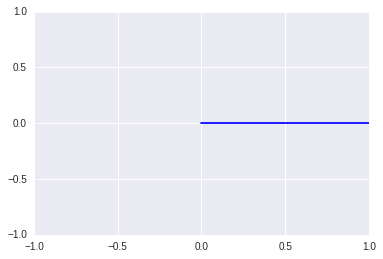

In [35]:
fig, ax = plt.subplots()
ax.set(ylim=(-1, 1),
      xlim=(-1, 1))
# ax.add_artist(plt.Circle((0, 0), 1))
ax.add_artist(plt.Line2D((0, 1), (0, 0)))

In [37]:
from itertools import zip_longest

In [38]:
zip_longest([1, 3], [1], fillvalue=2)

In [39]:
list(_)

[(1, 1), (3, 2)]

In [43]:
x = symbols('x_0:2')
p = symbols('p_0:2')

In [47]:
x = Matrix(x)
p = Matrix(p)
t = Matrix([1, 0])

In [50]:
q_0 = x - Matrix([0, 0])

In [51]:
q_1 = x - Matrix([10, 0])

In [57]:
q_0, q_1

⎛⎡x₀⎤, ⎡x₀ - 10⎤⎞
⎜⎢  ⎥  ⎢       ⎥⎟
⎝⎣x₁⎦  ⎣  x₁   ⎦⎠

In [58]:
t.T * q_0 + t.T * q_1

[2⋅x₀ - 10]

In [60]:
tuple(zip((4, 0), (5, 0)))

((4, 5), (0, 0))

In [63]:
import operator as op

In [73]:
import itertools 

In [75]:
map(op.add, (1, 2, 3), itertools.repeat(1))

In [76]:
list(_)

[2, 3, 4]